In [6]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('data_400_5000.csv',sep = ',', index_col= 'Unnamed: 0')
data.head(3)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [47]:
data_state_mask = data.state_name == 'Capital Federal'
data_state = data[data_state_mask]
data_state.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
13,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,NaN,NaN,...,30.0,2234.000000,3723.333333,NaN,1.0,NaN,http://www.properati.com.ar/15bp9_venta_depart...,Torre I Mondrian. 3 ambientes con terraza y d...,Vitraux Palermo,https://thumbs4.properati.com/2/ZTUjkRzTz6YvcU...


In [48]:
data_state.pivot_table(index= 'place_name', columns= 'property_type', aggfunc= {'operation': 'count'})

operation                      
property_type           PH apartment house store
place_name                                      
Abasto                13.0      62.0   3.0   7.0
Agronomía              3.0      20.0   1.0   1.0
Almagro               54.0     707.0  21.0  22.0
Balvanera             26.0     415.0   2.0  27.0
Barracas              36.0     274.0  34.0  10.0
...                    ...       ...   ...   ...
Villa Riachuelo        1.0       NaN   2.0   NaN
Villa Santa Rita       7.0      14.0   6.0   NaN
Villa Soldati          1.0       3.0   1.0   1.0
Villa Urquiza         63.0     970.0  40.0  11.0
Villa del Parque      30.0     279.0  27.0   7.0

[62 rows x 4 columns]

In [53]:
pd.set_option("display.max_rows", None)
data_state['place_name'].value_counts()

Belgrano                2061
Palermo                 1859
Caballito               1671
Recoleta                1130
Villa Urquiza           1084
Villa Crespo            1015
Flores                  1007
San Telmo                995
Barrio Norte             857
Almagro                  804
Capital Federal          769
Nuñez                    511
Balvanera                470
Palermo Hollywood        432
Saavedra                 406
Boedo                    375
Barracas                 354
Villa del Parque         343
Monserrat                328
Villa Luro               296
Palermo Soho             294
Floresta                 287
Mataderos                286
Villa Devoto             261
San Cristobal            256
Colegiales               256
Liniers                  248
Parque Patricios         227
Congreso                 222
Coghlan                  195
Puerto Madero            191
Centro / Microcentro     184
Chacarita                178
Retiro                   168
Boca          

In [54]:
# selección de barrios con similares características
list_places_name = ['Nuñez','Belgrano','Palermo', 'Recoleta', 'Barrio Norte', 'Palermo Hollywood']
mask_places  = data['place_name'].apply(lambda x : x in list_places_name)
data = data.loc[mask_places,:]
data.head()


,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
19,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.580503566,-58.4058744847",-34.580504,-58.405874,...,96.0,3365.384615,3645.833333,NaN,3.0,NaN,http://www.properati.com.ar/15bq8_venta_depart...,Excelente semipiso al contra frente en Bulnes ...,"Bulnes y Libertador: espectacular pulmón, con ...",https://thumbs4.properati.com/8/1y9fKHLee-aQQj...
21,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.590926,-58.4116653",-34.590926,-58.411665,...,73.0,2292.372881,3705.479452,NaN,4.0,NaN,http://www.properati.com.ar/15bqd_venta_depart...,"EXCELENTE ZONA, MULTIPLES MEDIOS DE TRANSPORTE...",Departamento de 4 ambientes en Venta en Palermo,https://thumbs4.properati.com/0/P6wPIXB1wJFLVU...
60,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5535776,-58.4555114",-34.553578,-58.455511,...,50.0,3460.000000,3460.000000,NaN,2.0,NaN,http://www.properati.com.ar/15bvo_venta_depart...,ESPECTACULAR DEPARTAMENTO DE 2 AMBIENTES CON C...,"VENTA 2 AMB CON COCH, PISCINA PARA INVERSION...",https://thumbs4.properati.com/0/HIvLnvwib7BBZ5...


In [55]:
data.isnull().sum()

operation                        0
property_type                    0
place_name                       0
place_with_parent_names          0
country_name                     0
state_name                       0
geonames_id                    432
lat-lon                       1718
lat                           1718
lon                           1718
price                            0
currency                         0
price_aprox_local_currency       0
price_aprox_usd                  0
surface_total_in_m2              0
surface_covered_in_m2          369
price_usd_per_m2                 0
price_per_m2                   369
floor                         6497
rooms                         3848
expenses                      4625
properati_url                    0
description                      0
title                            0
image_thumbnail                 54
dtype: int64

In [56]:
data.shape

(6850, 25)

In [57]:
data['place_name'].value_counts()

Belgrano             2061
Palermo              1859
Recoleta             1130
Barrio Norte          857
Nuñez                 511
Palermo Hollywood     432
Name: place_name, dtype: int64

A analizar:
rooms - cantidad de ambientes
amenities
tipo de propiedad
barrio

In [58]:
# data.groupby(['place_name','property_type'])['operation'].count()
data.pivot_table(index= 'place_name', columns= 'property_type', aggfunc= {'operation': 'count'})


operation                      
property_type            PH apartment house store
place_name                                       
Barrio Norte              9       806     6    36
Belgrano                 34      1913    80    34
Nuñez                    18       450    26    17
Palermo                  78      1691    36    54
Palermo Hollywood        14       392     8    18
Recoleta                  6      1073     2    49

In [59]:
data_apparment = data.loc[data.property_type == 'apartment']
data_apparment.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
19,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.580503566,-58.4058744847",-34.580504,-58.405874,...,96.0,3365.384615,3645.833333,NaN,3.0,NaN,http://www.properati.com.ar/15bq8_venta_depart...,Excelente semipiso al contra frente en Bulnes ...,"Bulnes y Libertador: espectacular pulmón, con ...",https://thumbs4.properati.com/8/1y9fKHLee-aQQj...
21,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.590926,-58.4116653",-34.590926,-58.411665,...,73.0,2292.372881,3705.479452,NaN,4.0,NaN,http://www.properati.com.ar/15bqd_venta_depart...,"EXCELENTE ZONA, MULTIPLES MEDIOS DE TRANSPORTE...",Departamento de 4 ambientes en Venta en Palermo,https://thumbs4.properati.com/0/P6wPIXB1wJFLVU...
60,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5535776,-58.4555114",-34.553578,-58.455511,...,50.0,3460.000000,3460.000000,NaN,2.0,NaN,http://www.properati.com.ar/15bvo_venta_depart...,ESPECTACULAR DEPARTAMENTO DE 2 AMBIENTES CON C...,"VENTA 2 AMB CON COCH, PISCINA PARA INVERSION...",https://thumbs4.properati.com/0/HIvLnvwib7BBZ5...


In [60]:
data_apparment.shape

(6325, 25)

In [61]:
data_apparment.isnull().sum()

operation                        0
property_type                    0
place_name                       0
place_with_parent_names          0
country_name                     0
state_name                       0
geonames_id                    392
lat-lon                       1637
lat                           1637
lon                           1637
price                            0
currency                         0
price_aprox_local_currency       0
price_aprox_usd                  0
surface_total_in_m2              0
surface_covered_in_m2          327
price_usd_per_m2                 0
price_per_m2                   327
floor                         5988
rooms                         3454
expenses                      4172
properati_url                    0
description                      0
title                            0
image_thumbnail                 51
dtype: int64

In [15]:
#busqueda de amenities en dataset final

#match amenities
pattern_amenities = "balcon|balcón"#|cochera|parrilla|pileta|amoblado|lavadero|patio|terraza|jardin|jardín"
match_pattern_amenities = data_apparment.description.str.contains(pattern_amenities, regex= True)
print('Coincidencias amenities ' + str(match_pattern_amenities.sum()))
mask_match_pattern_amenities_notnull = match_pattern_amenities.notnull()



Coincidencias amenities 1614


In [16]:
#incorporación de columna 'amenities' al data final
data_apparment.loc[mask_match_pattern_amenities_notnull, "amenities"] = match_pattern_amenities[mask_match_pattern_amenities_notnull].astype(int)

c:\Users\alejo\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\Users\alejo\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [22]:

pattern_balcon = "balcón|balcon"

pattern_balcon_regex = re.compile(pattern_balcon)
address_series = data.address
resultado_nombres = address_series.apply(lambda x: pattern_nombre_regex.search(x))
#print(type(resultado))
print(resultado_nombres)


AttributeError: 'DataFrame' object has no attribute 'address'

In [ ]:
calles_match = resultado_nombres.apply(lambda x: x if x is None else x.group('nombre_calle'))
calles_match

In [ ]:
description_date_series = data_apparment['description']
description_date_series

7         EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...
8         EXCELENTE DOS AMBIENTES  ESTRENAR AMPLIO SUPER...
19        Excelente semipiso al contra frente en Bulnes ...
21        EXCELENTE ZONA, MULTIPLES MEDIOS DE TRANSPORTE...
60        ESPECTACULAR DEPARTAMENTO DE 2 AMBIENTES CON C...
                                ...                        
121113    Amplio 3 ambientes en pleno Palermo, a una cua...
121146    VENTA PISO CON COCHERA EN PALERMOMuy buena ubi...
121157    Torre de 16º pisos ubicado en pleno centro com...
121160    Edificio en esquina de muy buena categoría de ...
121209    Edificio en esquina de muy buena categoría de ...
Name: description, Length: 4054, dtype: object

In [ ]:
amenities_pattern = "(P<balcon>(balcon|balcón))"
amenities_pattern_regex = re.compile(amenities_pattern)

data_amenities_match = description_date_series.apply(lambda x: x if x is np.NaN else amenities_pattern_regex.search(x))

mask_data_amenities_match_notnull = data_amenities_match.notnull()

data_apparment.loc[mask_data_amenities_match_notnull, "amenities_1"] = data_amenities_match[mask_data_amenities_match_notnull].apply(lambda x: x.group('balcon'))



c:\Users\Irma\anaconda3\envs\dhdsblend2021\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
data_amenities_match

7         None
8         None
19        None
21        None
60        None
          ... 
121113    None
121146    None
121157    None
121160    None
121209    None
Name: description, Length: 4054, dtype: object

In [ ]:
data_apparment['amenities_1']

7         NaN
8         NaN
19        NaN
21        NaN
60        NaN
         ... 
121113    NaN
121146    NaN
121157    NaN
121160    NaN
121209    NaN
Name: amenities_1, Length: 4054, dtype: object

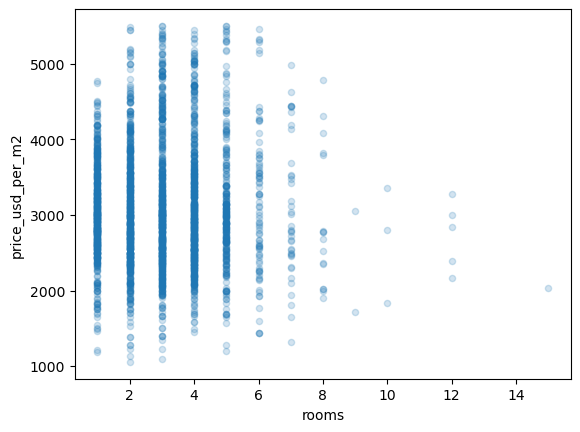

In [64]:
# Realizar un scatterplot con 'temp' sobre el 'eje x' y 'total' sobre el 'eje y'
data_apparment.plot(kind='scatter', x='rooms', y='price_usd_per_m2', alpha=0.2); #alpha le da los distintos tonos al gráfico para ver dónde hay mayor acumulación de puntos

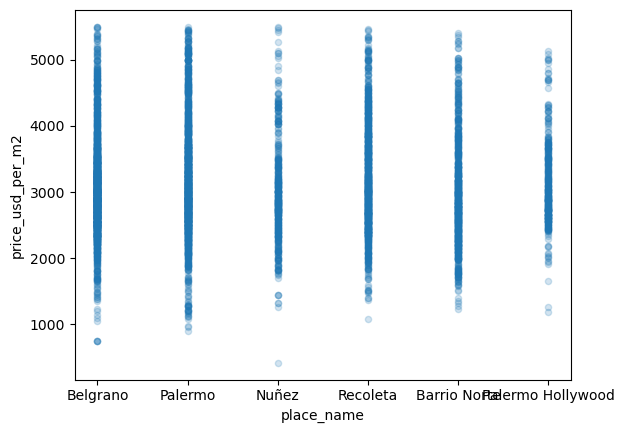

In [63]:
data_apparment.plot(kind='scatter', x='place_name', y='price_usd_per_m2', alpha=0.2); #alpha le da los distintos tonos al gráfico para ver dónde hay mayor acumulación de puntos

c:\Users\alejo\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='place_name', ylabel='price_usd_per_m2'>

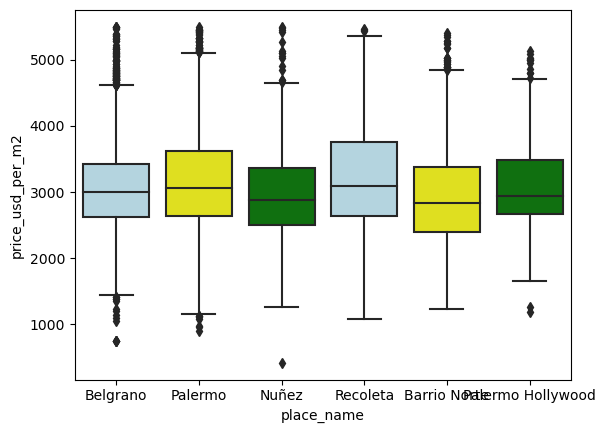

In [62]:
palette_place = ['lightblue', 'yellow', 'green']  
sns.boxplot('place_name', 'price_usd_per_m2', data = data_apparment, palette = palette_place) 